                                                    Total Input  Total Output  \
Institution Name                                                                
Tianjin University                                     3.659879      3.700255   
Nankai University                                      3.037646      3.193350   
Tianjin Medical University                             2.710038      3.165156   
Hebei University of Technology                         2.654310      1.610004   
Tiangong University                                    2.146942      2.732615   
Tianjin Normal University                              2.382514      2.834528   
Tianjin University of Science and Technology           2.366584      2.383243   
Tianjin University of Traditional Chinese Medicine     2.391279      2.505372   
Tianjin University of Technology                       2.427469      0.974186   
Tianjin University of Finance and Economics            2.346142      1.691926   
Civil Aviation University of

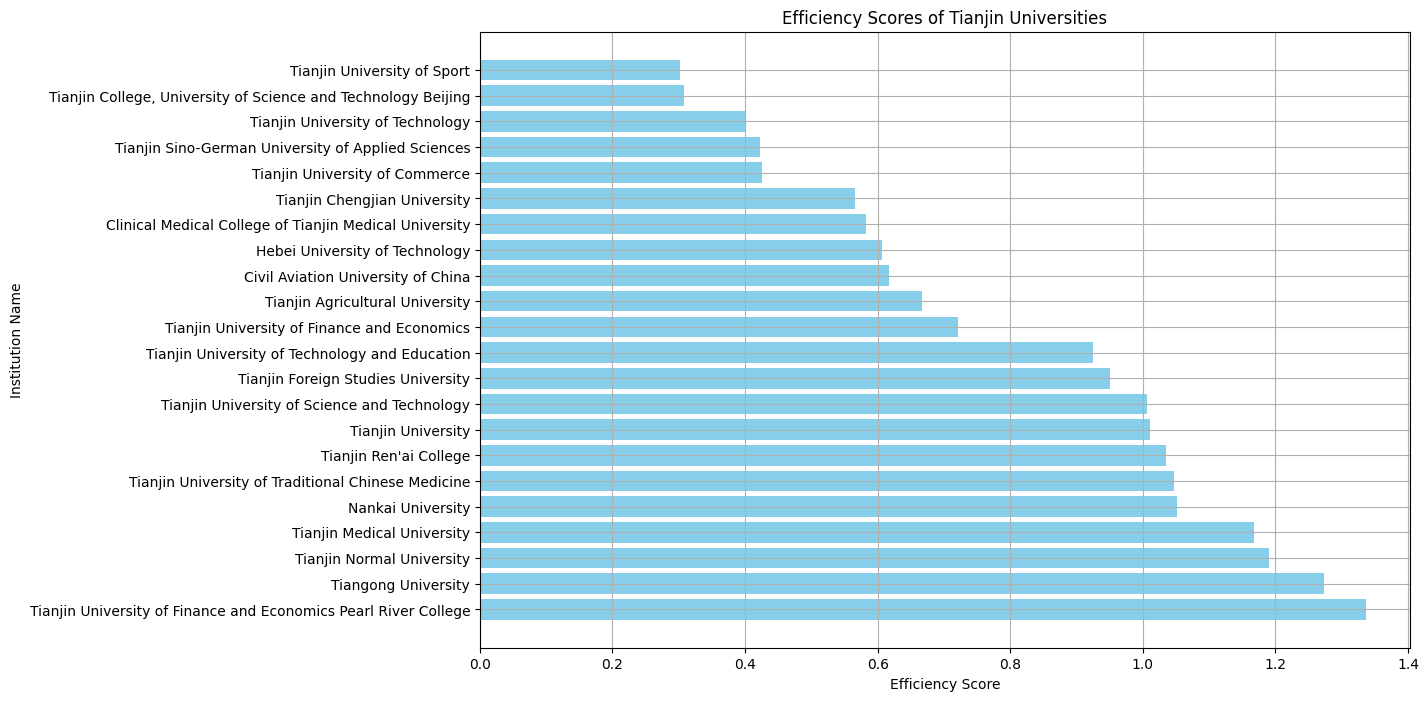

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

file_path_new = 'InstitutionData.xlsx'
df_all_schools = pd.read_excel(file_path_new)

df_all_schools['Student-Teacher Ratio'] = df_all_schools['Institution Size (Number of Undergraduate Students)'] / df_all_schools['Number of Full-time Faculty Members']

input_columns_all = [
    "Student-Teacher Ratio", 
    "Proportion of Faculty with Doctoral Degrees",
    "Per Student Investment in Educational Resources (CNY)",
    "Per Student Facility Area (Square Meters)",
    "Library Holdings (in 10,000 volumes)"
]

output_columns_all = [
    "Undergraduate Graduation Rate", 
    "Postgraduate Enrollment Rate",
    "Graduate Employment Rate", 
    "Teaching Evaluation Score"
]

df_inputs_outputs_all = df_all_schools[input_columns_all + output_columns_all]

scaler = MinMaxScaler()
df_scaled_all_schools = pd.DataFrame(scaler.fit_transform(df_inputs_outputs_all), 
                                     columns=df_inputs_outputs_all.columns, 
                                     index=df_all_schools['Institution Name'])

df_scaled_all_schools['Total Input'] = df_scaled_all_schools[input_columns_all].sum(axis=1)
df_scaled_all_schools['Total Output'] = df_scaled_all_schools[output_columns_all].sum(axis=1)

df_scaled_all_schools['Efficiency Score'] = df_scaled_all_schools['Total Output'] / df_scaled_all_schools['Total Input']

result = df_scaled_all_schools[['Total Input', 'Total Output', 'Efficiency Score']]

print(result)

plt.figure(figsize=(12, 8))
result_sorted = df_scaled_all_schools.sort_values('Efficiency Score', ascending=False)
plt.barh(result_sorted.index, result_sorted['Efficiency Score'], color='skyblue')
plt.xlabel('Efficiency Score')
plt.ylabel('Institution Name')
plt.title('Efficiency Scores of Tianjin Universities')
plt.grid(True)
plt.show()

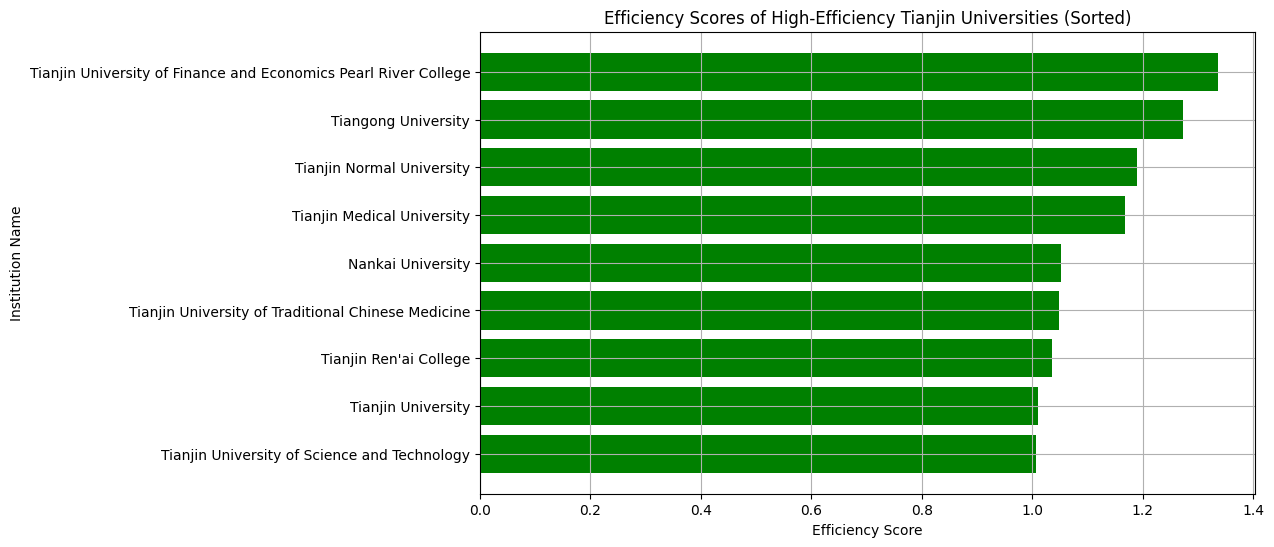

In [2]:
import matplotlib.pyplot as plt

high_efficiency_schools = df_scaled_all_schools[df_scaled_all_schools['Efficiency Score'] > 1.0].sort_values(by='Efficiency Score', ascending=False)
efficiency_scores = high_efficiency_schools['Efficiency Score']
labels = high_efficiency_schools.index

plt.figure(figsize=(10, 6))
plt.barh(labels, efficiency_scores, color='green')
plt.xlabel('Efficiency Score')
plt.ylabel('Institution Name')
plt.title('Efficiency Scores of High-Efficiency Tianjin Universities (Sorted)')
plt.grid(True)

plt.gca().invert_yaxis()

plt.show()

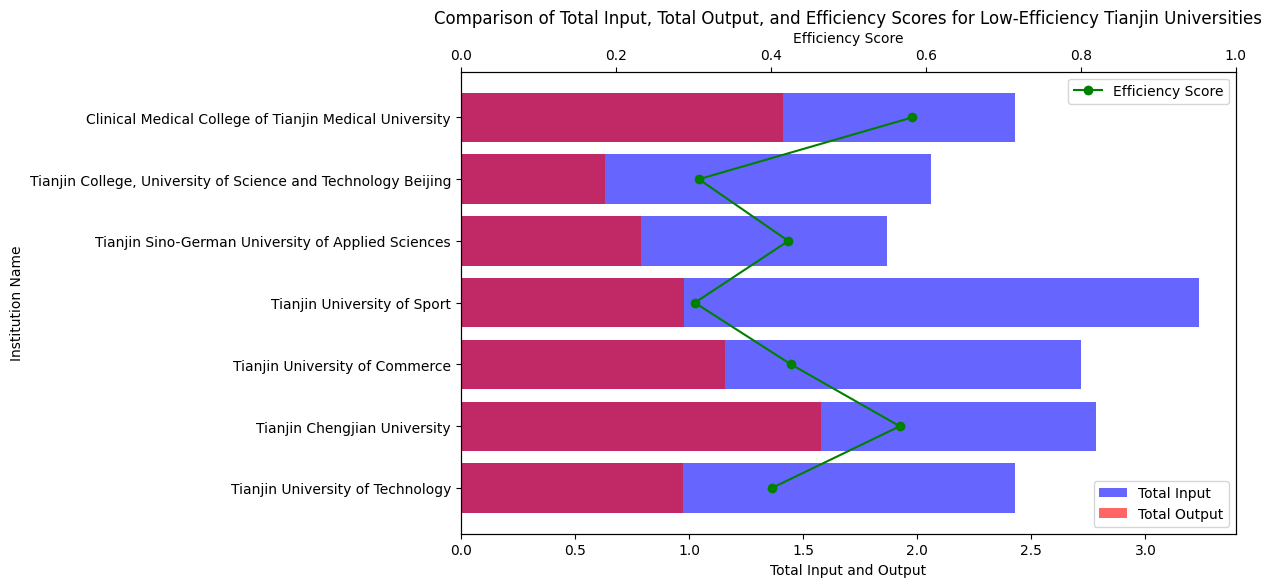

In [3]:
import matplotlib.pyplot as plt

low_efficiency_schools = df_scaled_all_schools[df_scaled_all_schools['Efficiency Score'] < 0.6]
total_inputs = low_efficiency_schools['Total Input']
total_outputs = low_efficiency_schools['Total Output']
efficiency_scores = low_efficiency_schools['Efficiency Score']
labels = low_efficiency_schools.index

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.barh(labels, total_inputs, color='blue', alpha=0.6, label='Total Input')
ax1.barh(labels, total_outputs, color='red', alpha=0.6, label='Total Output')

ax2 = ax1.twiny()
ax2.plot(efficiency_scores, labels, "go-", label='Efficiency Score')
ax2.set_xlim(0, 1)

ax1.set_xlabel('Total Input and Output')
ax2.set_xlabel('Efficiency Score')
ax1.set_ylabel('Institution Name')
ax1.set_title('Comparison of Total Input, Total Output, and Efficiency Scores for Low-Efficiency Tianjin Universities')
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')

plt.show()


                                                    Input Redundancy  \
Institution Name                                                       
Tianjin University                                         -0.040376   
Nankai University                                          -0.155704   
Tianjin Medical University                                 -0.455118   
Hebei University of Technology                              1.044307   
Tiangong University                                        -0.585673   
Tianjin Normal University                                  -0.452013   
Tianjin University of Science and Technology               -0.016659   
Tianjin University of Traditional Chinese Medicine         -0.114093   
Tianjin University of Technology                            1.453283   
Tianjin University of Finance and Economics                 0.654216   
Civil Aviation University of China                          1.108938   
Tianjin Chengjian University                                1.20

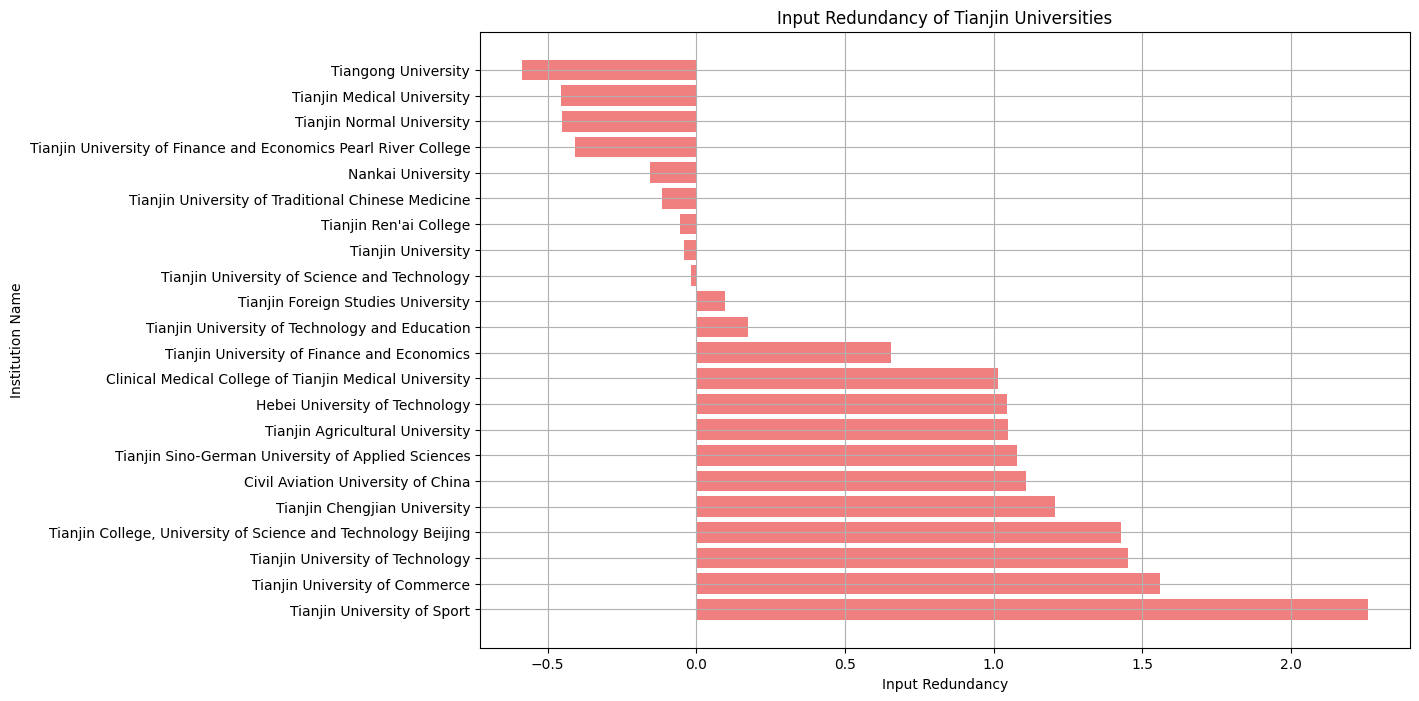

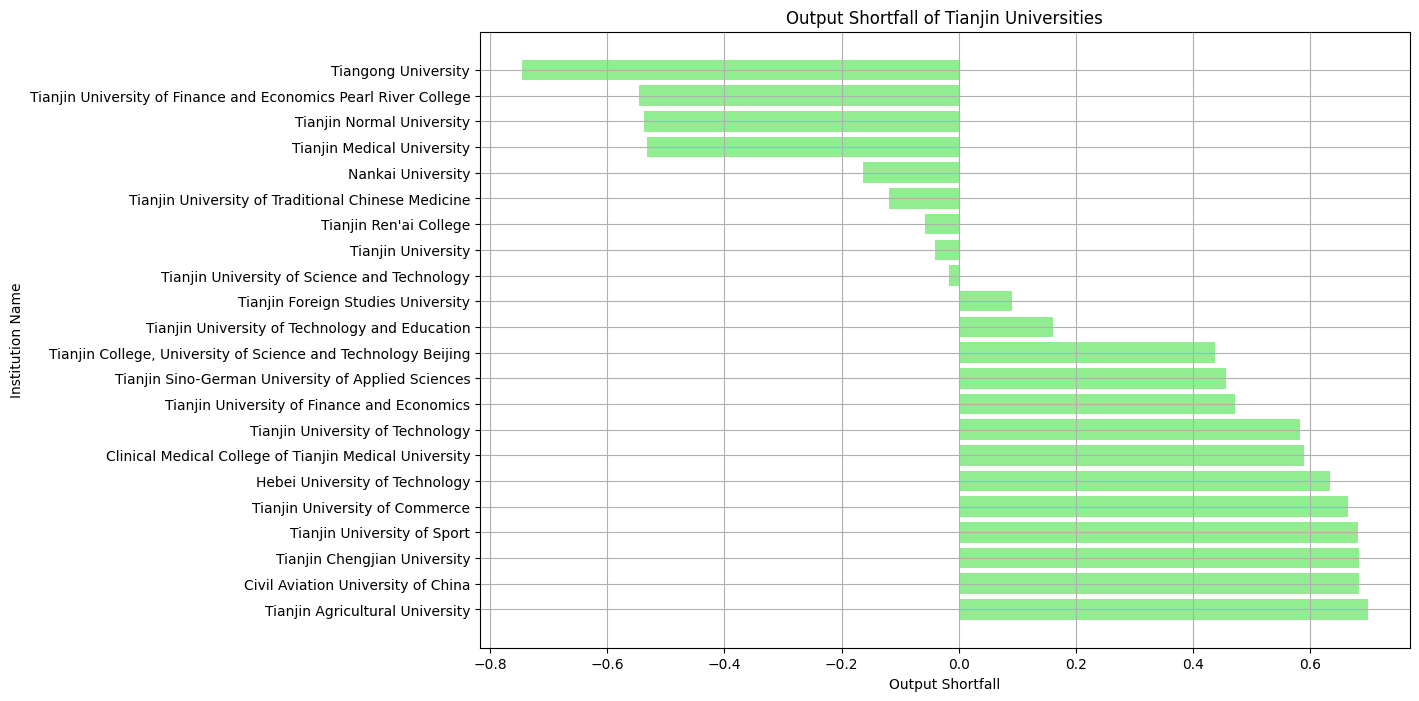

In [4]:
import numpy as np

df_scaled_all_schools['Input Redundancy'] = df_scaled_all_schools['Total Input'] - df_scaled_all_schools['Efficiency Score'] * df_scaled_all_schools['Total Input']
df_scaled_all_schools['Output Shortfall'] = df_scaled_all_schools['Total Output'] - df_scaled_all_schools['Efficiency Score'] * df_scaled_all_schools['Total Output']

redundancy_result = df_scaled_all_schools[['Input Redundancy', 'Output Shortfall']]
print(redundancy_result)

plt.figure(figsize=(12, 8))
redundancy_sorted = df_scaled_all_schools.sort_values('Input Redundancy', ascending=False)
plt.barh(redundancy_sorted.index, redundancy_sorted['Input Redundancy'], color='lightcoral')
plt.xlabel('Input Redundancy')
plt.ylabel('Institution Name')
plt.title('Input Redundancy of Tianjin Universities')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
shortfall_sorted = df_scaled_all_schools.sort_values('Output Shortfall', ascending=False)
plt.barh(shortfall_sorted.index, shortfall_sorted['Output Shortfall'], color='lightgreen')
plt.xlabel('Output Shortfall')
plt.ylabel('Institution Name')
plt.title('Output Shortfall of Tianjin Universities')
plt.grid(True)
plt.show()

                                                                   Input  \
                                                   Student-Teacher Ratio   
Institution Name                                                           
Tianjin University                                              0.000000   
Nankai University                                              -0.000793   
Tianjin Medical University                                     -0.005720   
Hebei University of Technology                                 -0.009986   
Tiangong University                                            -0.021402   
Tianjin Normal University                                      -0.031330   
Tianjin University of Science and Technology                   -0.028248   
Tianjin University of Traditional Chinese Medicine             -0.009747   
Tianjin University of Technology                               -0.009982   
Tianjin University of Finance and Economics                    -0.018689   
Civil Aviati

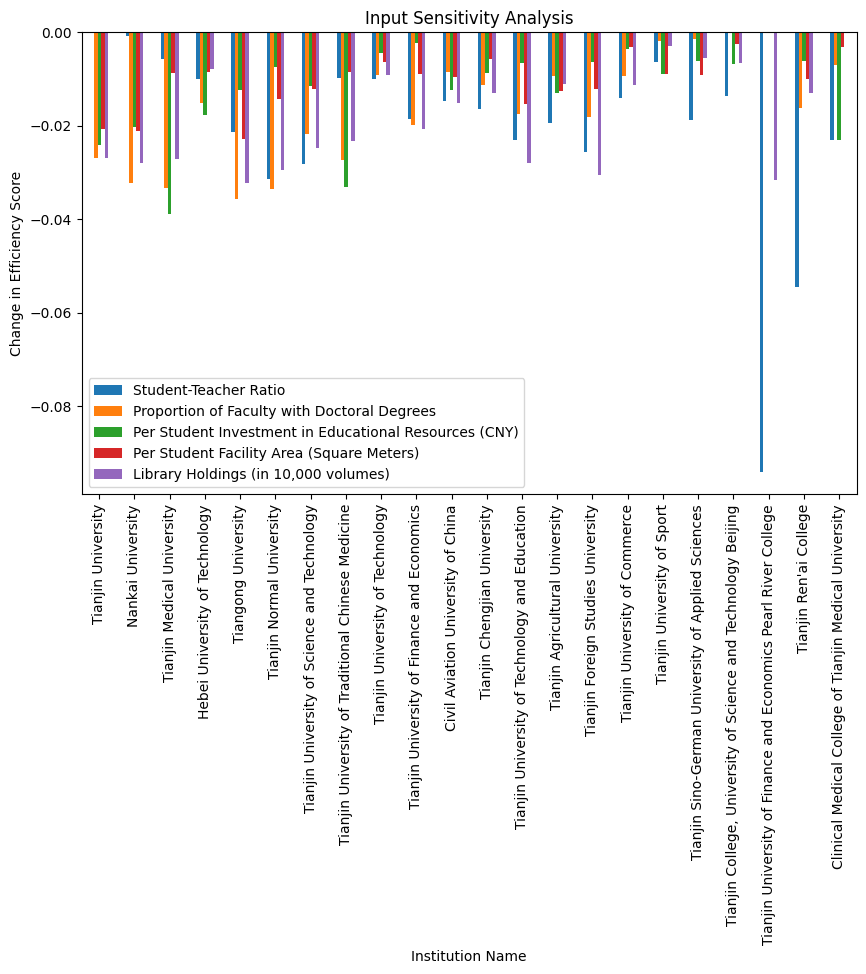

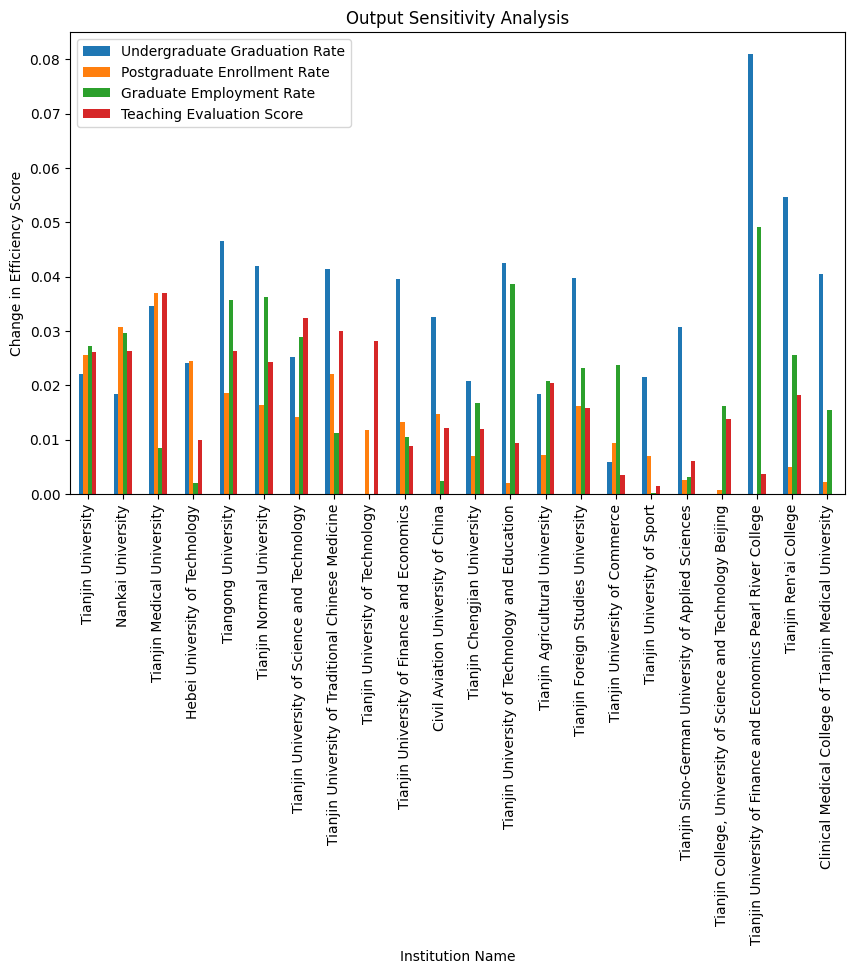

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

sensitivity_results_input = pd.DataFrame(index=df_scaled_all_schools.index)
sensitivity_results_output = pd.DataFrame(index=df_scaled_all_schools.index)

original_efficiency_scores = df_scaled_all_schools['Efficiency Score'].copy()

for input_var in input_columns_all:
    df_test = df_scaled_all_schools.copy()
    df_test[input_var] *= 1.1  
    df_test['Total Input'] = df_test[input_columns_all].sum(axis=1)
    df_test['Efficiency Score'] = df_test['Total Output'] / df_test['Total Input']
    sensitivity_results_input[input_var] = df_test['Efficiency Score'] - original_efficiency_scores

for output_var in output_columns_all:
    df_test = df_scaled_all_schools.copy()
    df_test[output_var] *= 1.1 
    df_test['Total Output'] = df_test[output_columns_all].sum(axis=1)
    df_test['Efficiency Score'] = df_test['Total Output'] / df_test['Total Input']
    sensitivity_results_output[output_var] = df_test['Efficiency Score'] - original_efficiency_scores

sensitivity_df = pd.concat([sensitivity_results_input, sensitivity_results_output], axis=1, keys=['Input', 'Output'])

print(sensitivity_df)

sensitivity_df['Input'].plot(kind='bar', figsize=(10, 6), title='Input Sensitivity Analysis')
plt.ylabel('Change in Efficiency Score')
plt.show()

sensitivity_df['Output'].plot(kind='bar', figsize=(10, 6), title='Output Sensitivity Analysis')
plt.ylabel('Change in Efficiency Score')
plt.show()


/Users/bingzihan17/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                                                    Cluster
Institution Name                                           
Tianjin University                                        2
Nankai University                                         2
Tianjin Medical University                                2
Hebei University of Technology                            1
Tiangong University                                       1
Tianjin Normal University                                 1
Tianjin University of Science and Technology              1
Tianjin University of Traditional Chinese Medicine        1
Tianjin University of Technology                          1
Tianjin University of Finance and Economics               1
Civil Aviation University of China                        1
Tianjin Chengjian University                              1
Tianjin University of Technology and Education            1
Tianjin Agricultural University                           1
Tianjin Foreign Studies University      

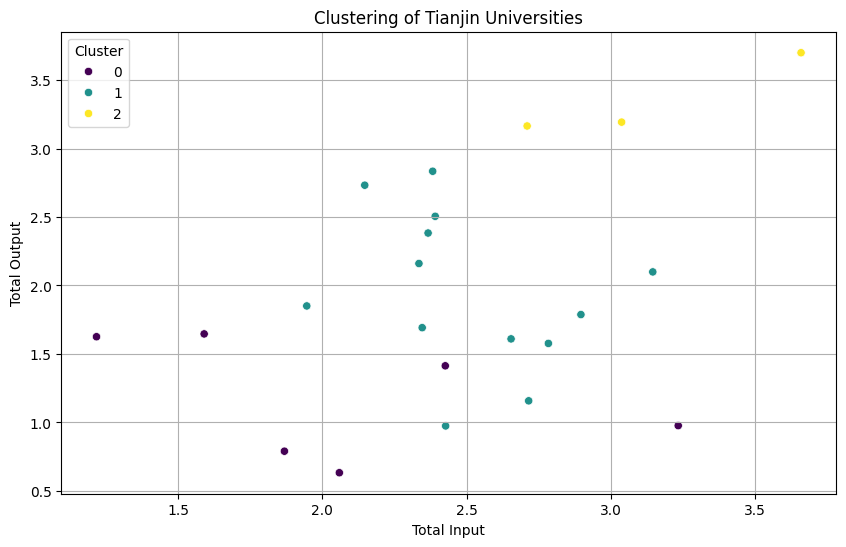

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled_all_schools['Cluster'] = kmeans.fit_predict(df_scaled_all_schools[input_columns_all + output_columns_all])

print(df_scaled_all_schools[['Cluster']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled_all_schools['Total Input'], y=df_scaled_all_schools['Total Output'], hue=df_scaled_all_schools['Cluster'], palette='viridis')
plt.title('Clustering of Tianjin Universities')
plt.xlabel('Total Input')
plt.ylabel('Total Output')
plt.grid(True)
plt.show()


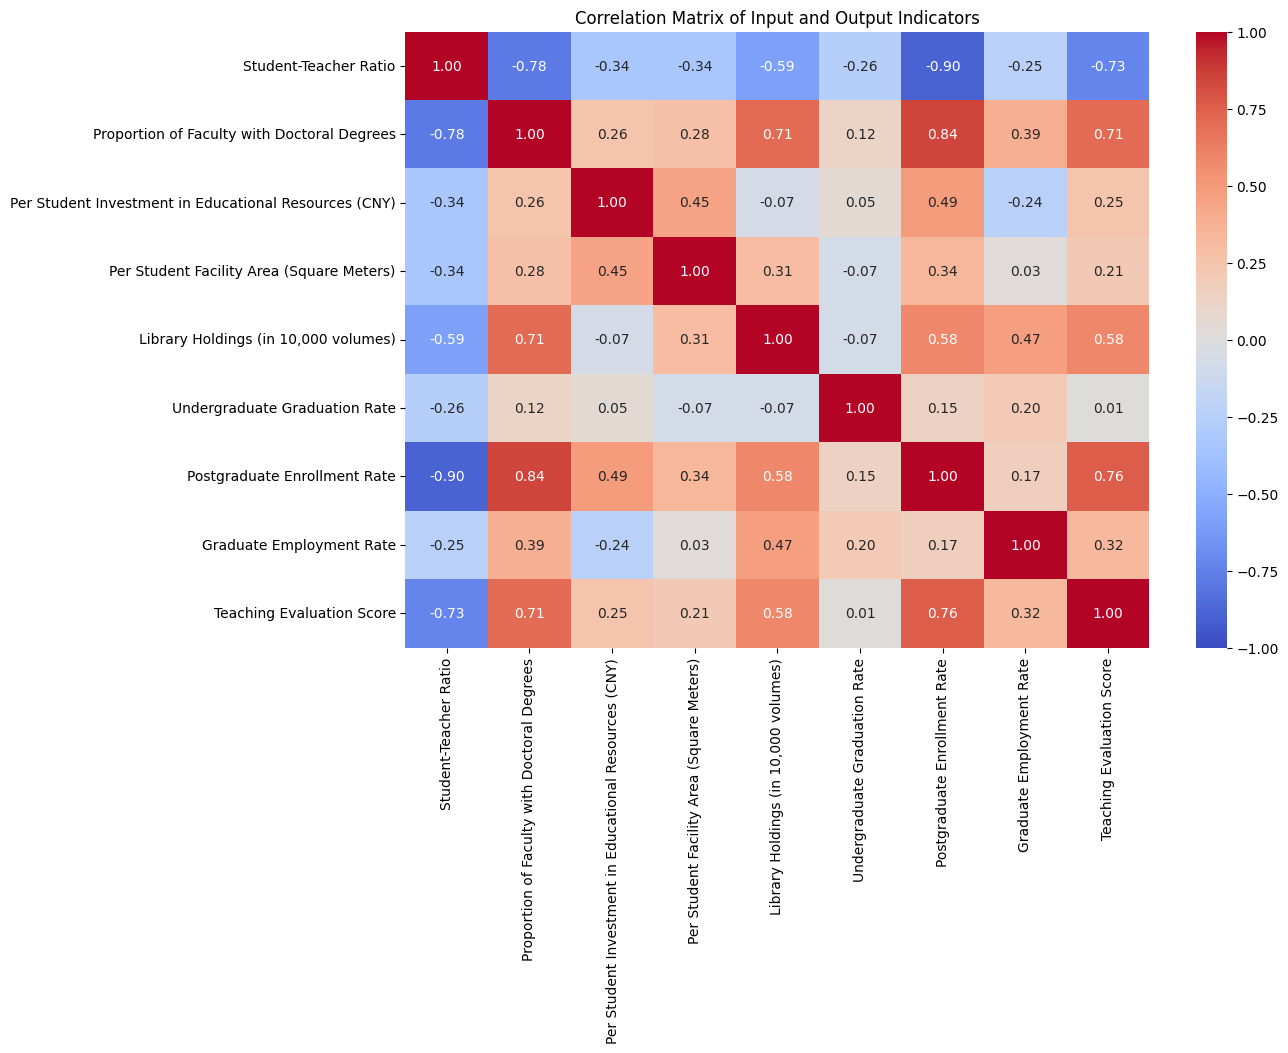

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_scaled_all_schools[input_columns_all + output_columns_all].corr()

plt.figure(figsize=(12, 8))
plt.title('Correlation Matrix of Input and Output Indicators')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()
